<a href="https://colab.research.google.com/github/Sajay1567/Test/blob/main/Project_Yes_Bank_Stock_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Poject Title - Yes_bank_stock_closing_price_prediction**

**Problem Description**

The goal of this analysis is to explore and understand the historical stock price trends of Yes Bank using the provided dataset. The dataset contains monthly stock prices for Yes Bank, including the Open, High, Low, and Close prices over a period of time. By performing Exploratory Data Analysis (EDA), we aim to uncover key insights and trends that could help in understanding the behavior of stock prices and identifying patterns.

**Data Description **
The dataset contains the following columns:

Date: The month and year of the stock prices.
Open: The price at which the stock started trading on the given date.
High: The highest price reached during the trading session.
Low: The lowest price reached during the trading session.
Close: The price at which the stock closed on the given date.
Expected Outcomes:
Insights into Price Trends: By analyzing stock prices over time, we can observe market trends, fluctuations, and key turning points.
Correlation Insights: Strong correlations between certain price metrics can indicate predictable behaviors, such as how the opening price influences the closing price.
Price Distributions: Understanding the distribution of stock prices helps in identifying whether the prices are normally distributed or if certain price levels are more frequent than others.







Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

**IMPORT DATASET**



In [ ]:
data = pd.read_csv('//content/Copy of data_YesBank_StockPrices.csv', encoding= 'unicode_escape')

In [ ]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


From the above command and figure, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

**Exploratory Data Analysis (EDA)**

**Understanding Your Variables**

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
data.describe(include = 'all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


# **Check Unique Values for each variable**

In [ ]:
# Loop through each column in the dataset and display unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n" + "="*50 + "\n")

# Alternatively, if you just want the count of unique values in each column:
unique_counts = data.nunique()
print("Number of unique values in each column:")
print(unique_counts)


Unique values in column 'Date':
['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 

# Data Distribution and mean and median of each single Indpendent variable

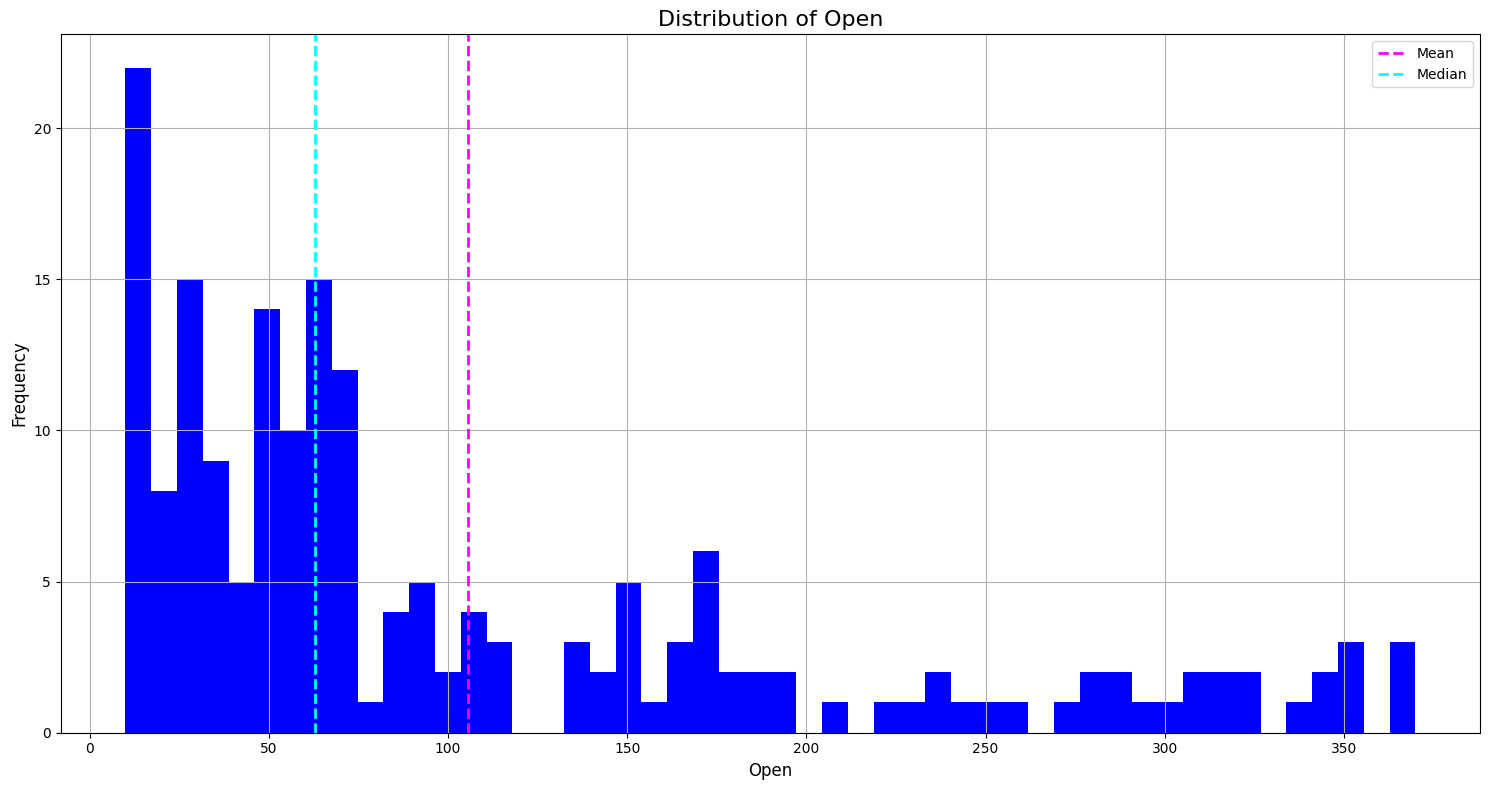

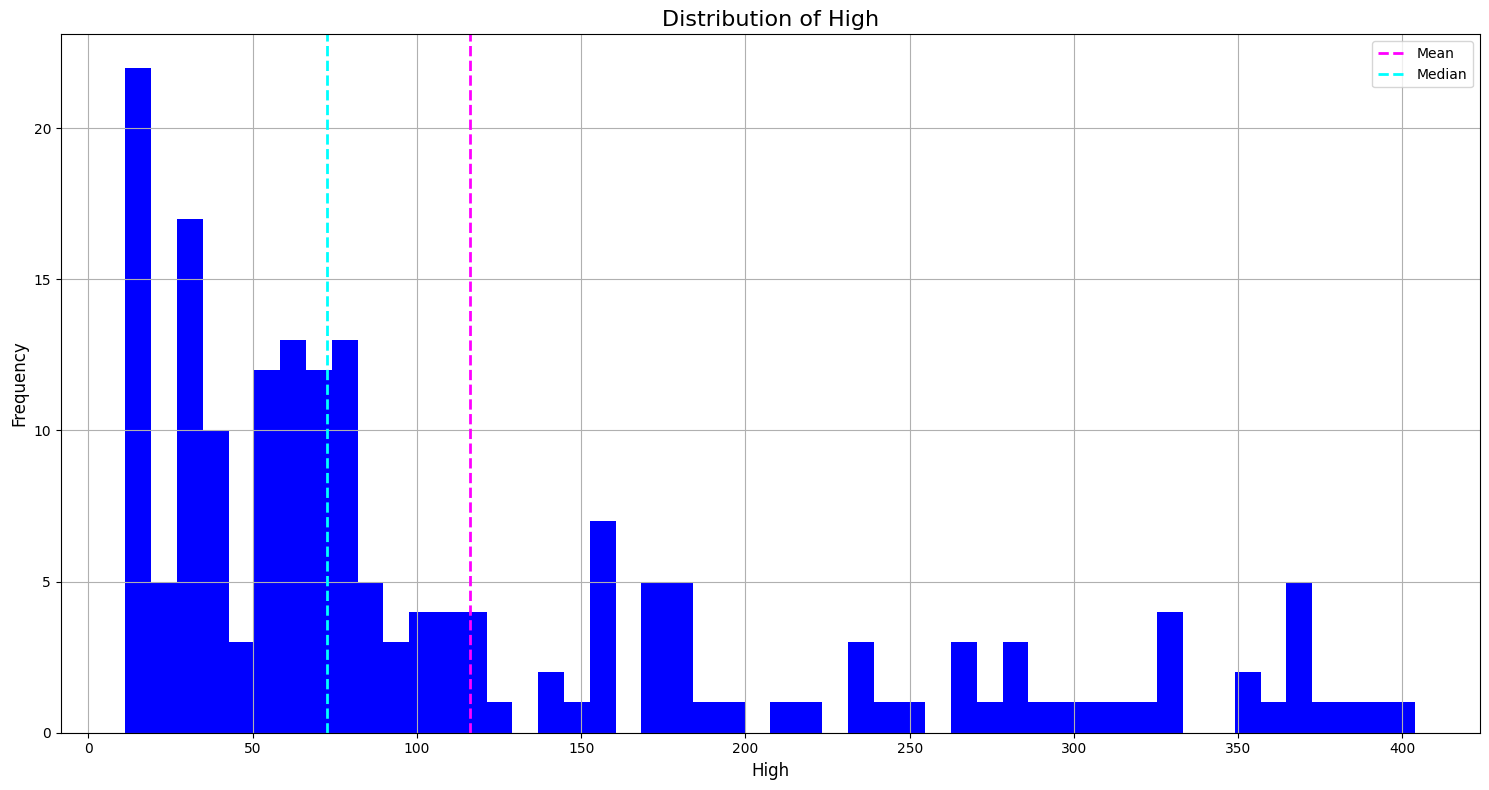

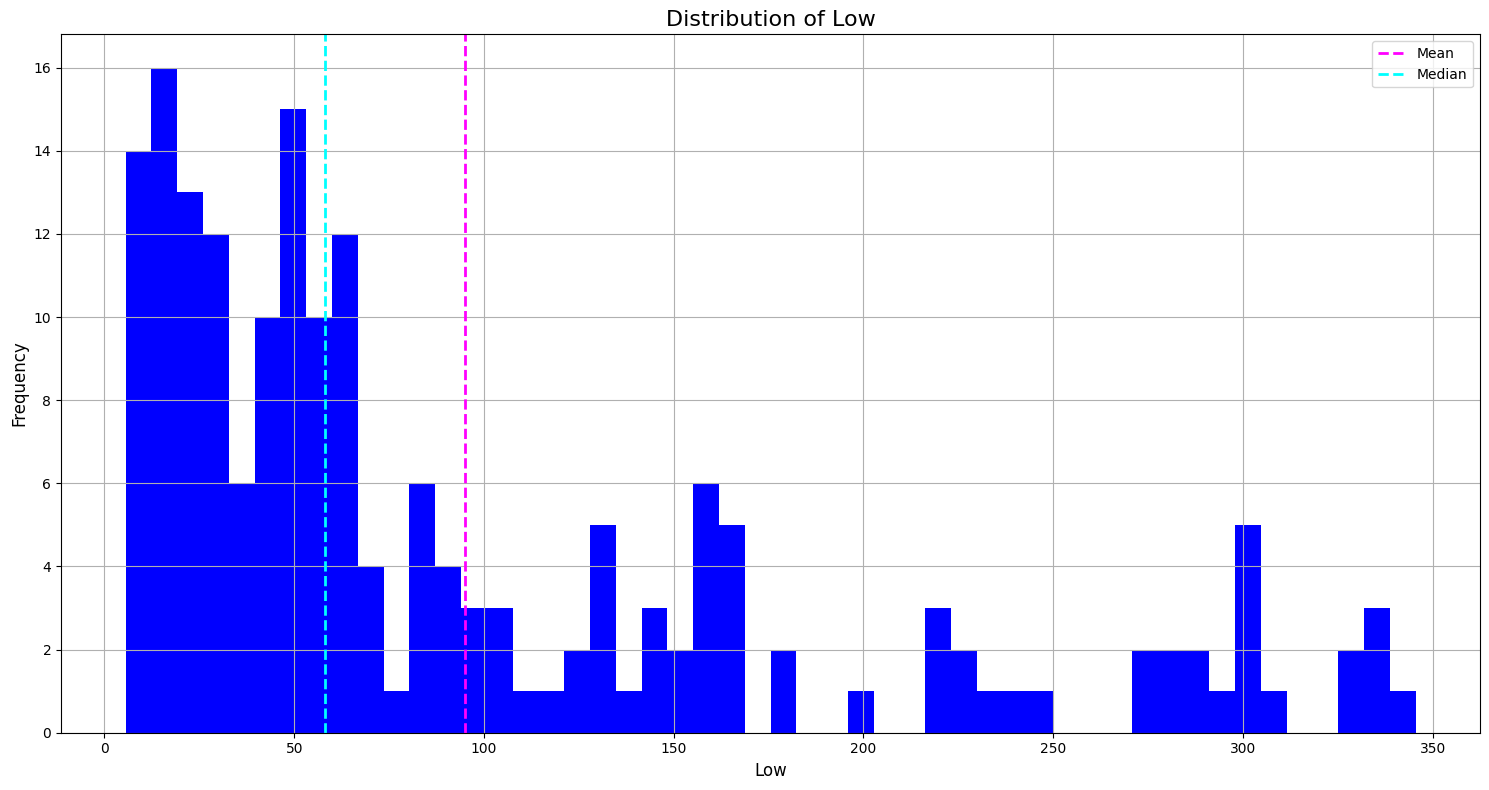

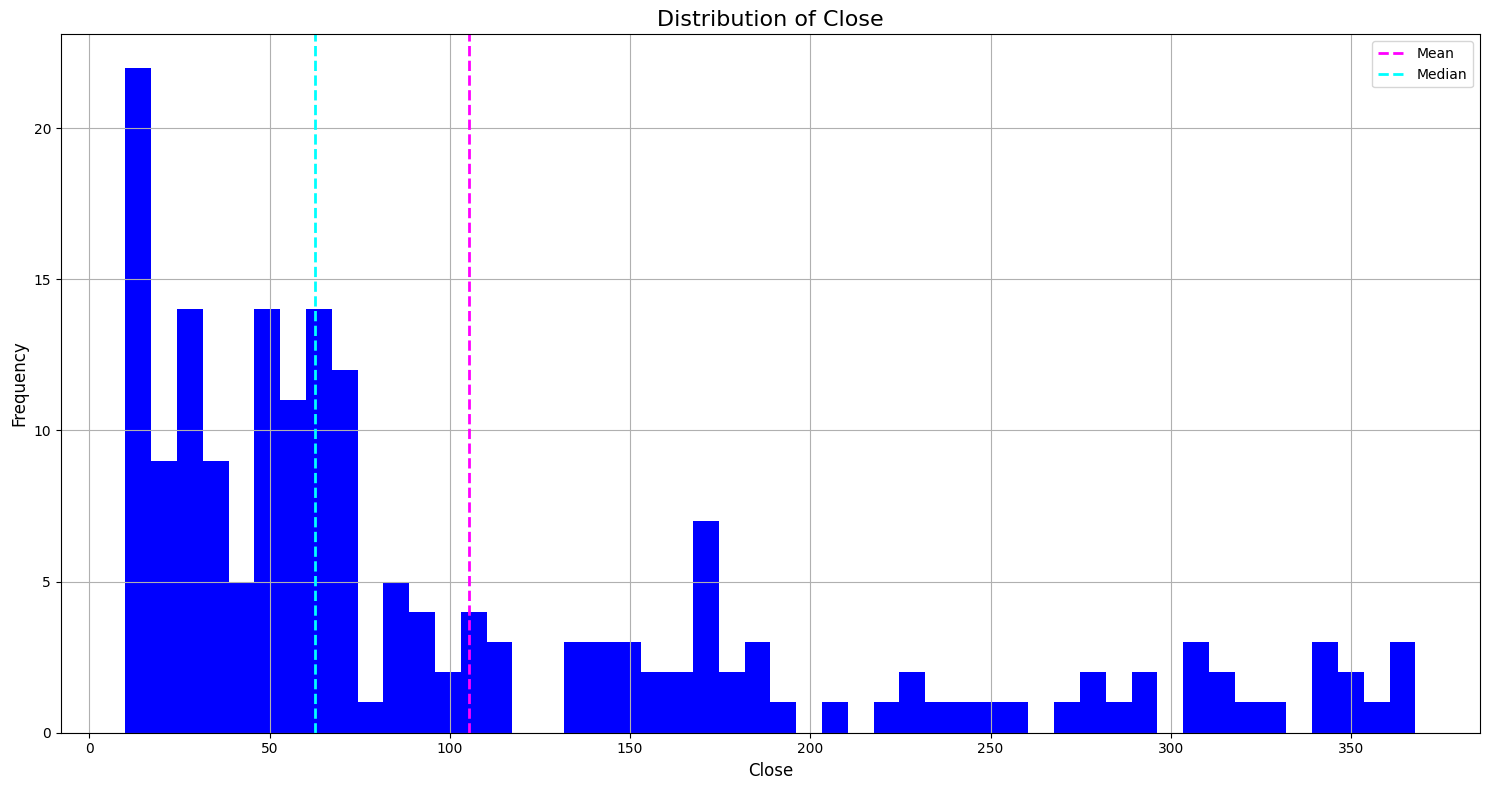

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'numerical_col' contains the list of numerical columns
numerical_col = ['Open', 'High', 'Low', 'Close']  # Adjust this list if needed

for i in numerical_col:
    fig = plt.figure(figsize=(15, 8))
    ax = fig.gca()

    # Select the feature and the target 'Close'
    features = data[i]
    label = data['Close']

    # Plot the histogram for the feature
    features.hist(bins=50, ax=ax, color='blue')

    # Add lines for mean and median
    ax.axvline(features.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(features.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')

    # Set the title and labels
    ax.set_title(f'Distribution of {i}', fontsize=16)
    ax.set_xlabel(i, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Add a legend
    ax.legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


# Variable Identification and Understanding Data

In [ ]:
# Correct way to convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')

# Description of the dataset (including all columns)
data.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
mean,2013-03-01 19:04:12.972973056,105.541405,116.104324,94.947838,105.204703
min,2005-07-01 00:00:00,10.000000,11.240000,5.550000,9.980000
25%,2009-05-01 00:00:00,33.800000,36.140000,28.510000,33.450000
50%,2013-03-01 00:00:00,62.980000,72.550000,58.000000,62.540000
75%,2017-01-01 00:00:00,153.000000,169.190000,138.350000,153.300000
max,2020-11-01 00:00:00,369.950000,404.000000,345.500000,367.900000
std,NaN,98.879850,106.333497,91.219415,98.583153


# With the help of describe we can conclude that data is not normally distributed as mean is higher than median in all features

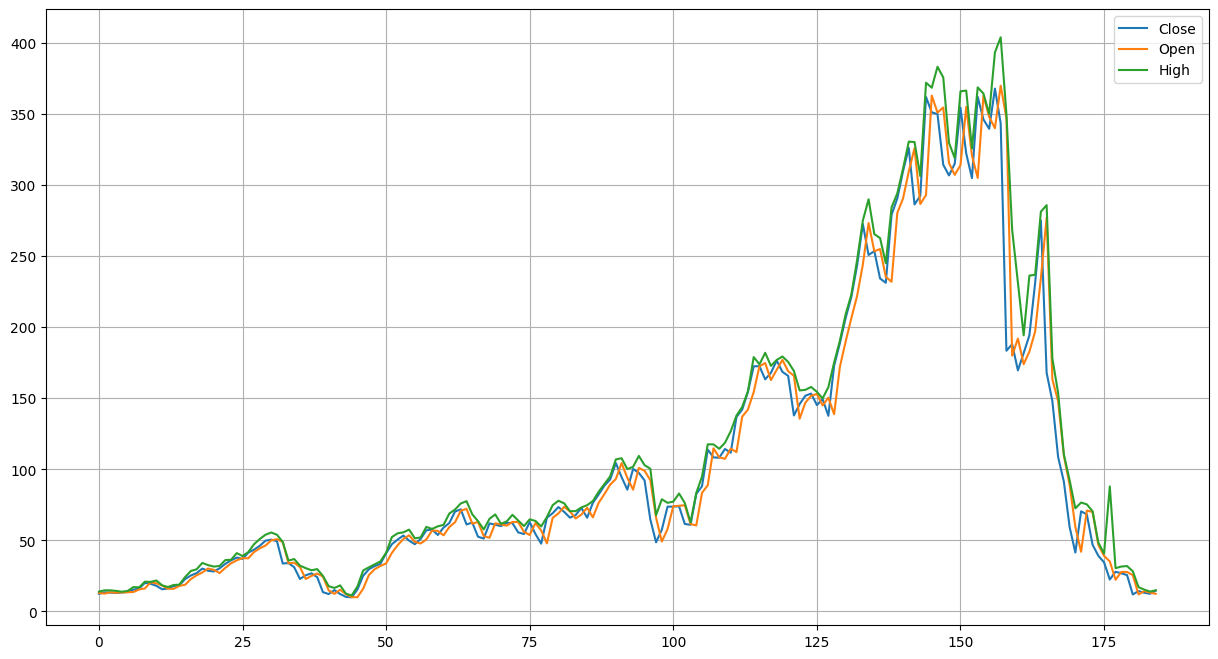

In [ ]:
# Identify Numerical Columns
numerical_col = data.describe().columns
numerical_col

# Line Plot
plt.figure(figsize=(15,8))
plt.plot(data['Close'])
plt.plot(data['Open'])
plt.plot(data['High'])
plt.legend(['Close','Open','High'])
plt.grid()

# Checking for NuN values and Outliers

In [ ]:
# Checking Null Values
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
# checking duplicate values
len(data[data.duplicated()])

0

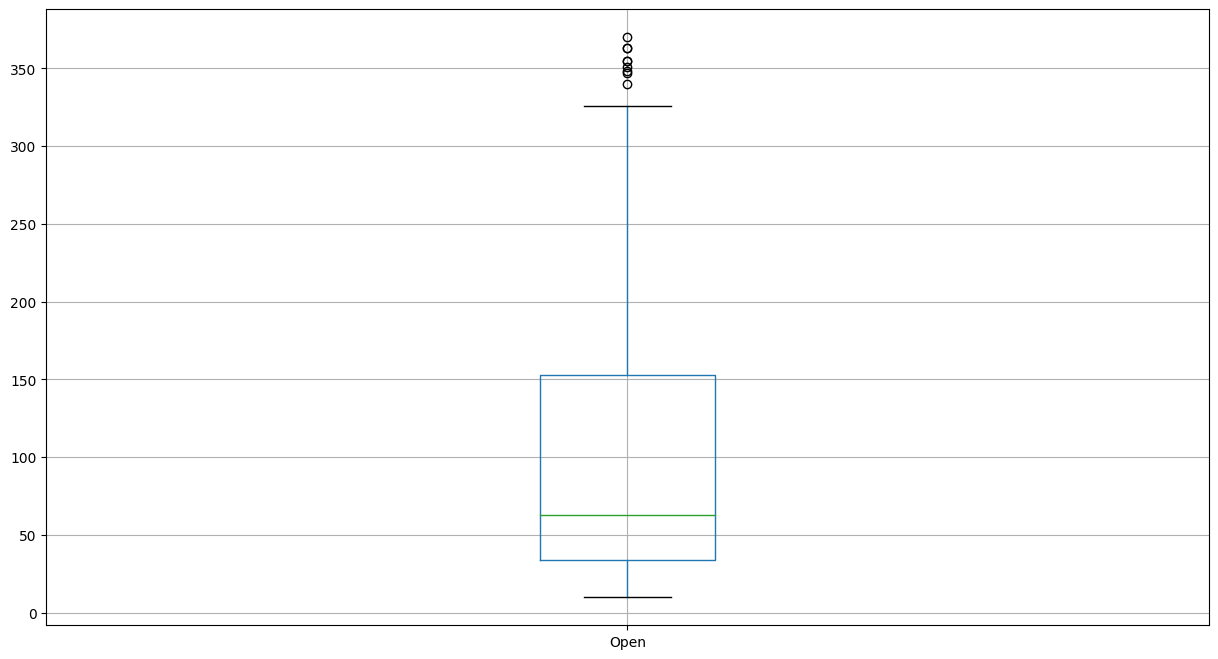

In [ ]:
plt.figure(figsize=(15,8))
data.boxplot('Open')
plt.show()

# Exploratory Data Analysis

Dependent Variable

<ipython-input-18-bc0afc298671>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'],color='blue')


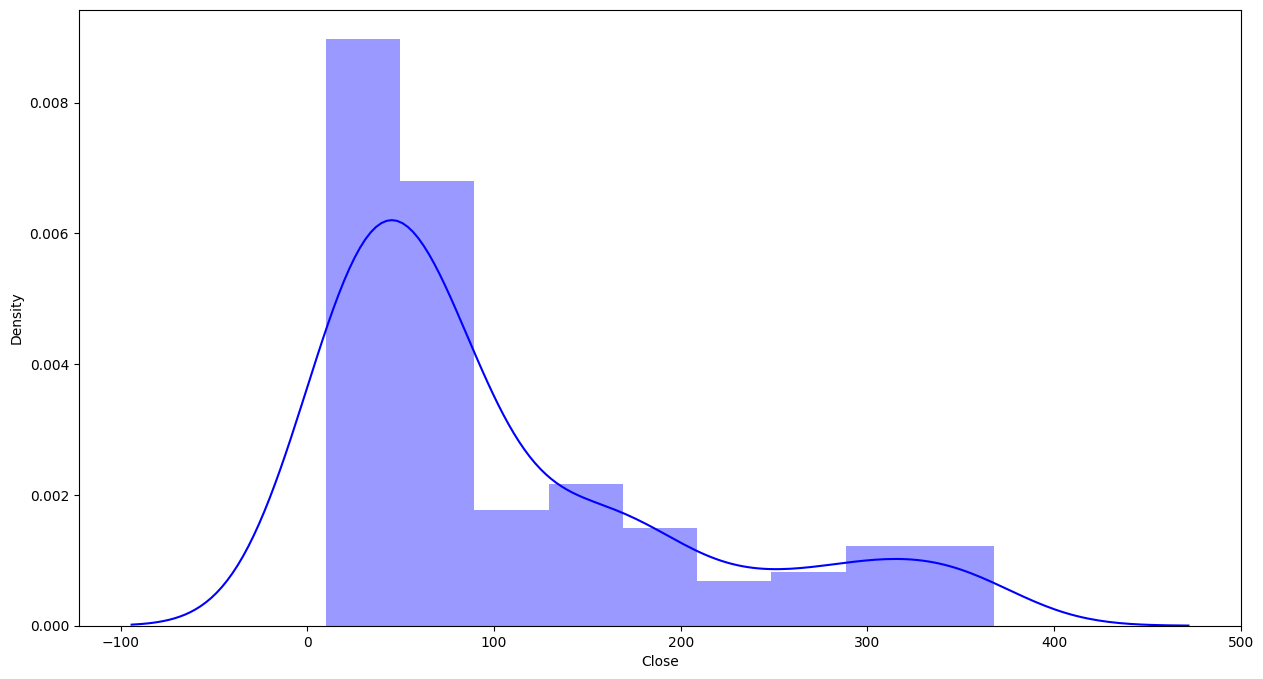

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data['Close'],color='blue')
plt.show()

<ipython-input-19-d8e5be33731b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data['Close']),color='blue')


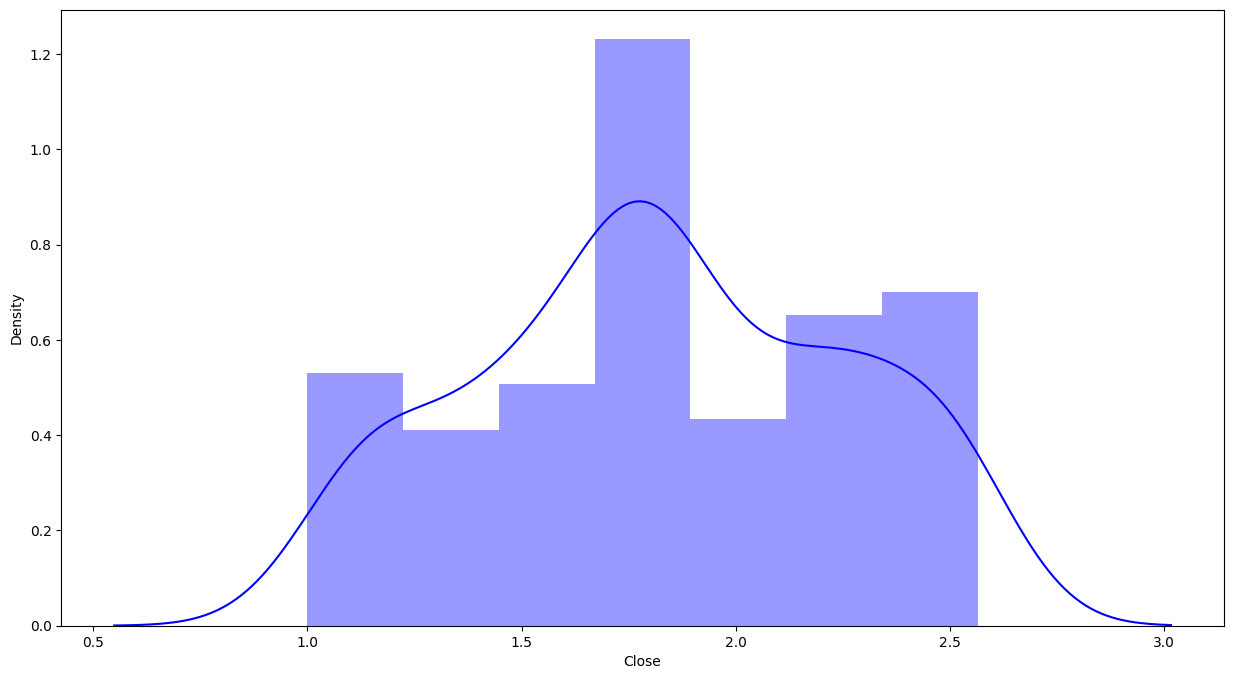

In [ ]:
# For normal Distribution
plt.figure(figsize=(15,8))
sns.distplot(np.log10(data['Close']),color='blue')
plt.show()

# Independent Variable

<ipython-input-20-816fb43662a7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Open'], color='blue')
<ipython-input-20-816fb43662a7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['High'], color='blue')
<ipython-input-20-816fb43662a7>:9: UserWarning: 

`distplot` is a deprecated f

<Axes: xlabel='Low', ylabel='Density'>

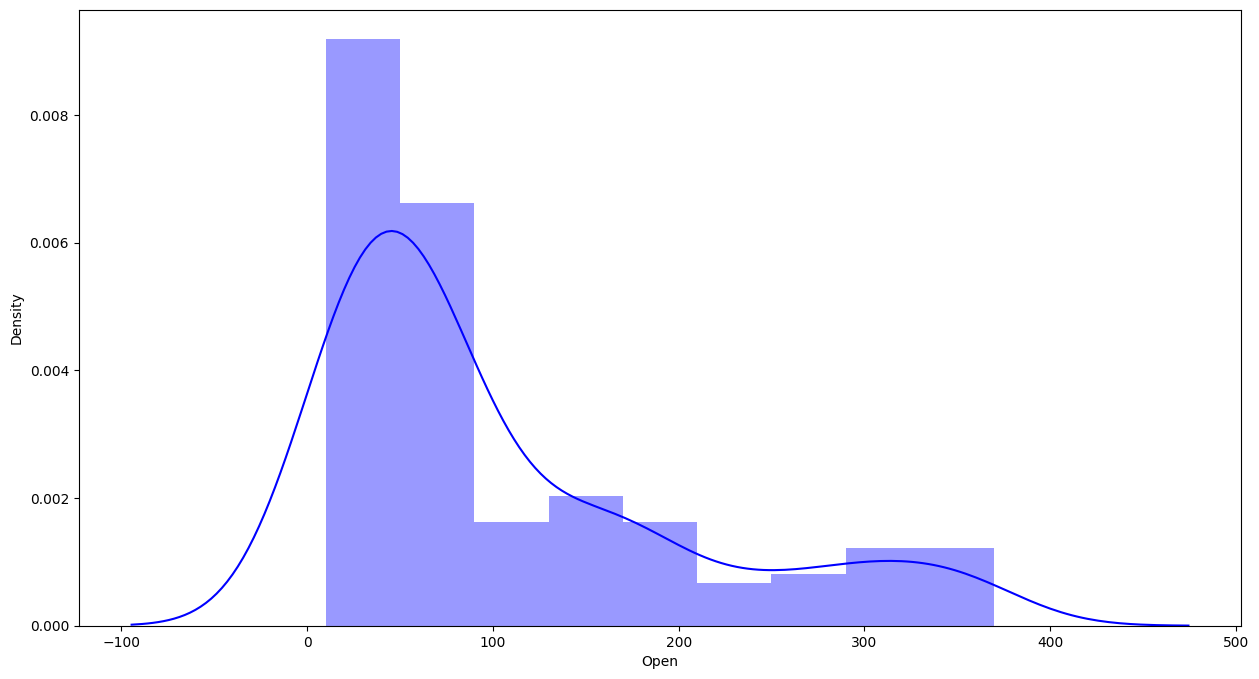

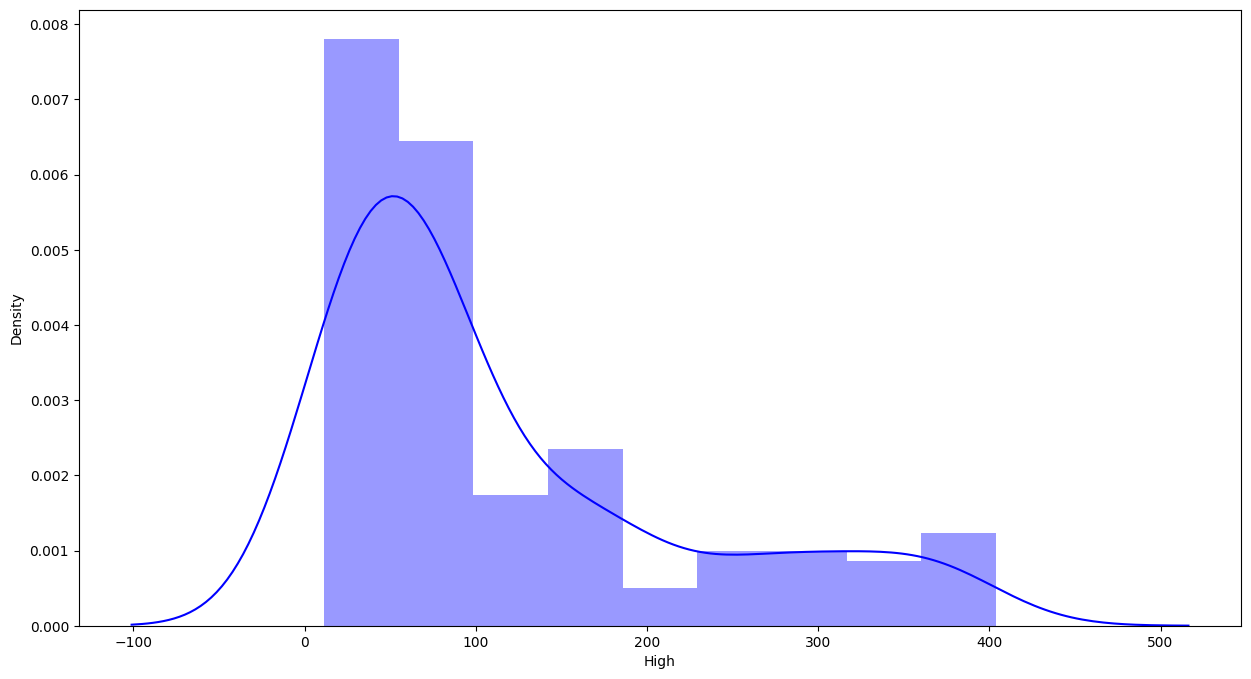

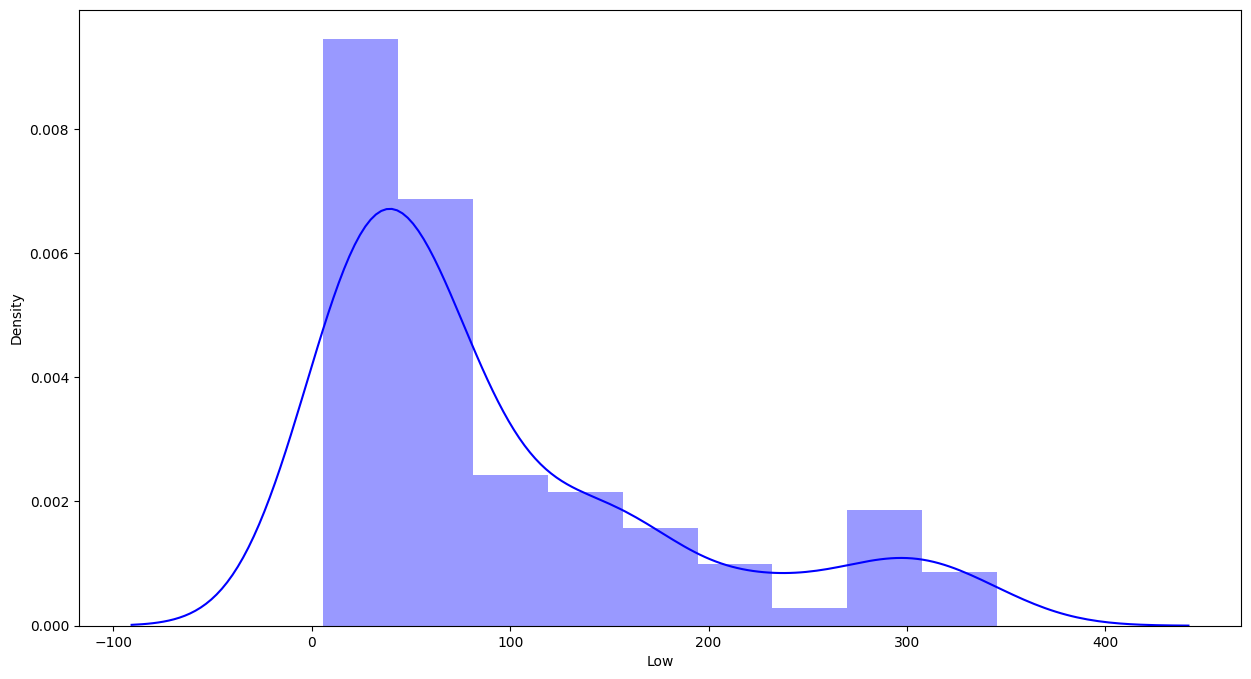

In [ ]:
# Independent variables
plt.figure(figsize=(15,8))
sns.distplot(data['Open'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(data['High'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(data['Low'], color='blue')

<ipython-input-21-f169d2988576>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data['Open']), color='blue')
<ipython-input-21-f169d2988576>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data['High']), color='blue')
<ipython-input-21-f169d2988576>:8: UserWarning: 

`distplo

<Axes: xlabel='Low', ylabel='Density'>

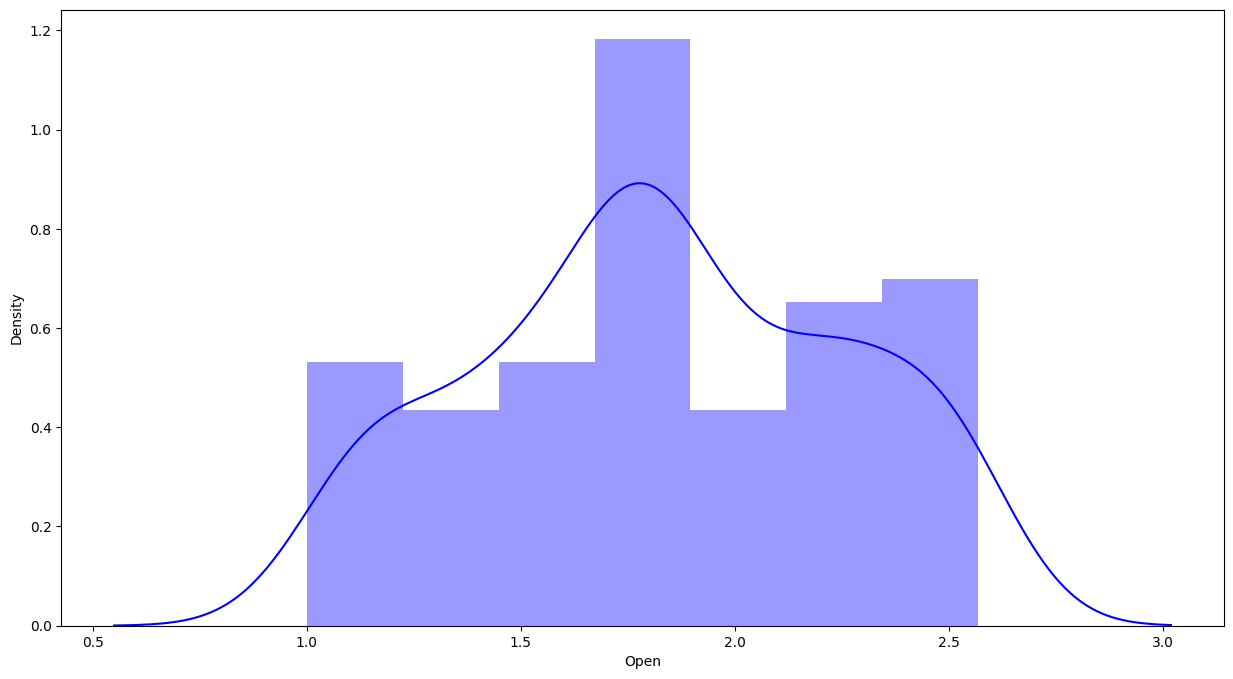

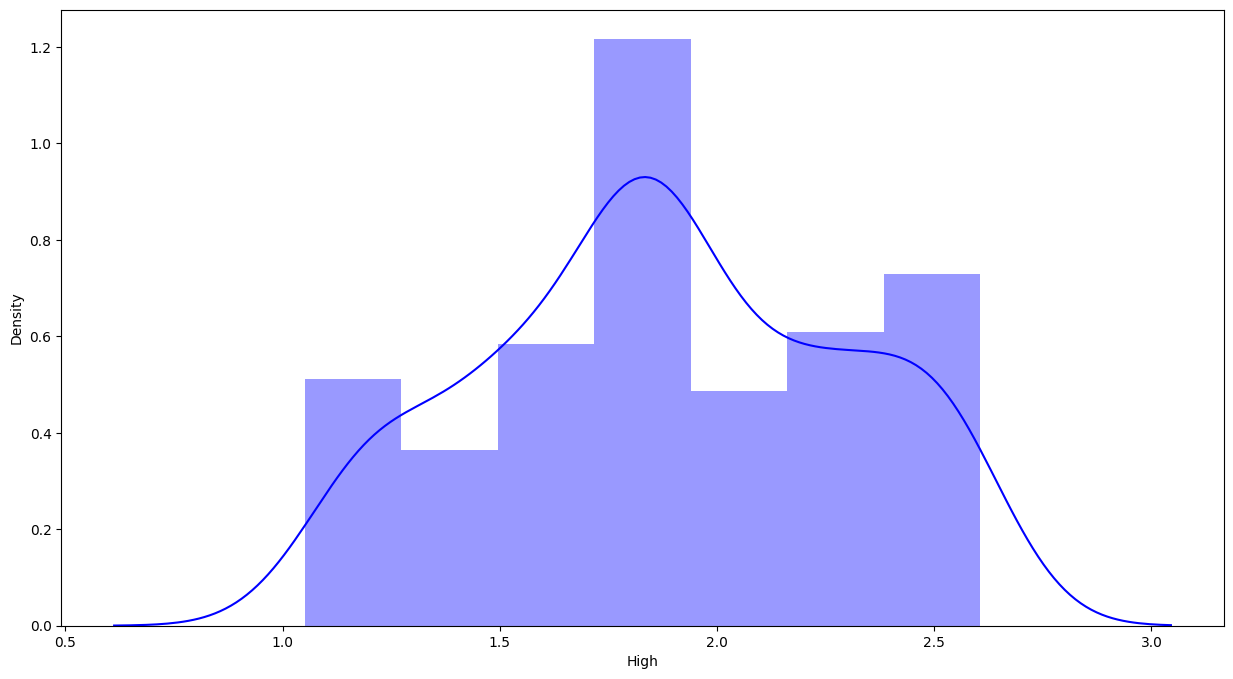

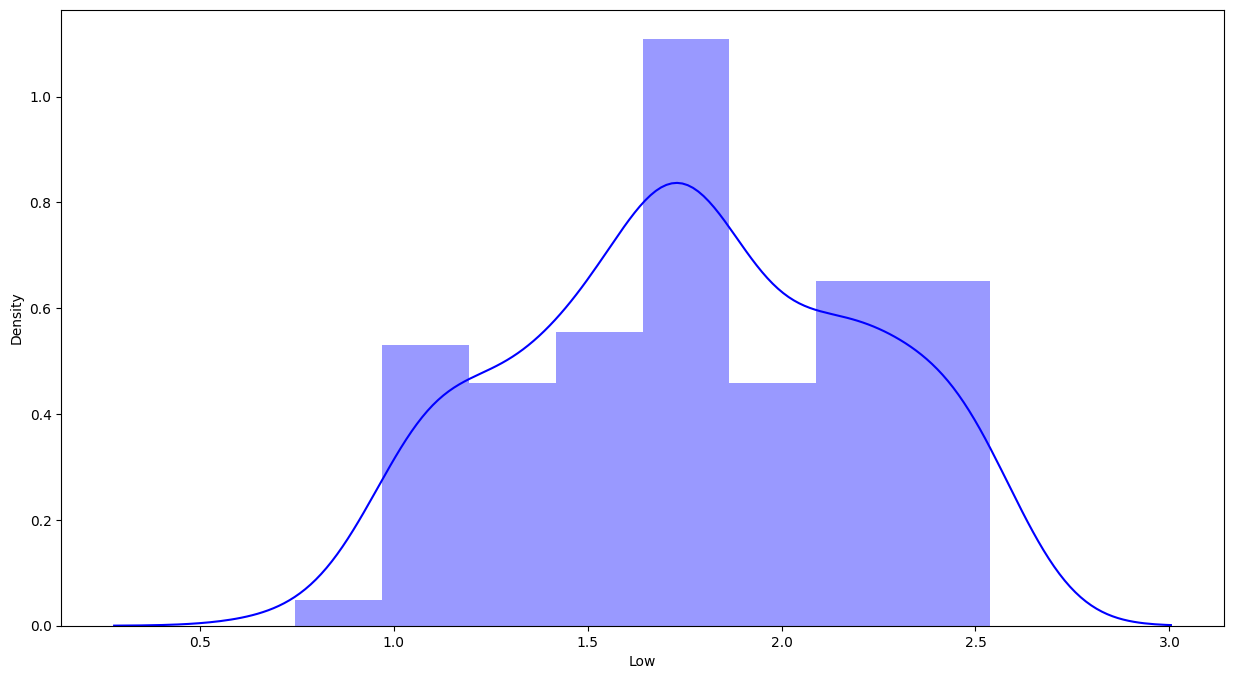

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(np.log10(data['Open']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(data['High']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(data['Low']), color='blue')

<Axes: >

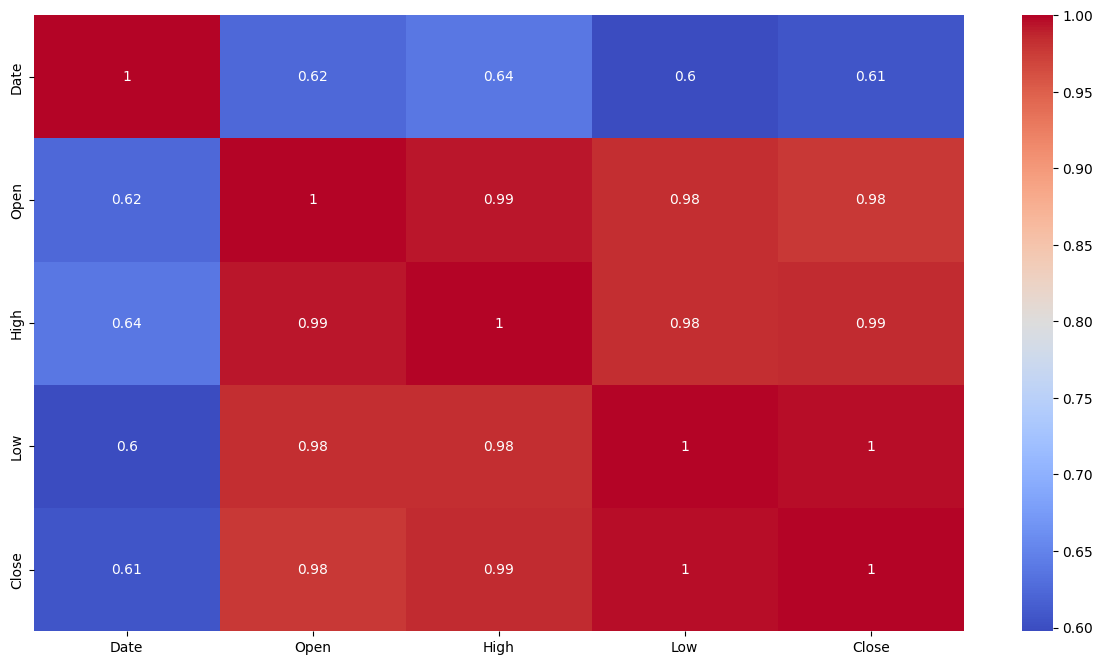

In [ ]:
# Correaltion Between the Variables
corr = data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

# Finding Correlation Between Variables

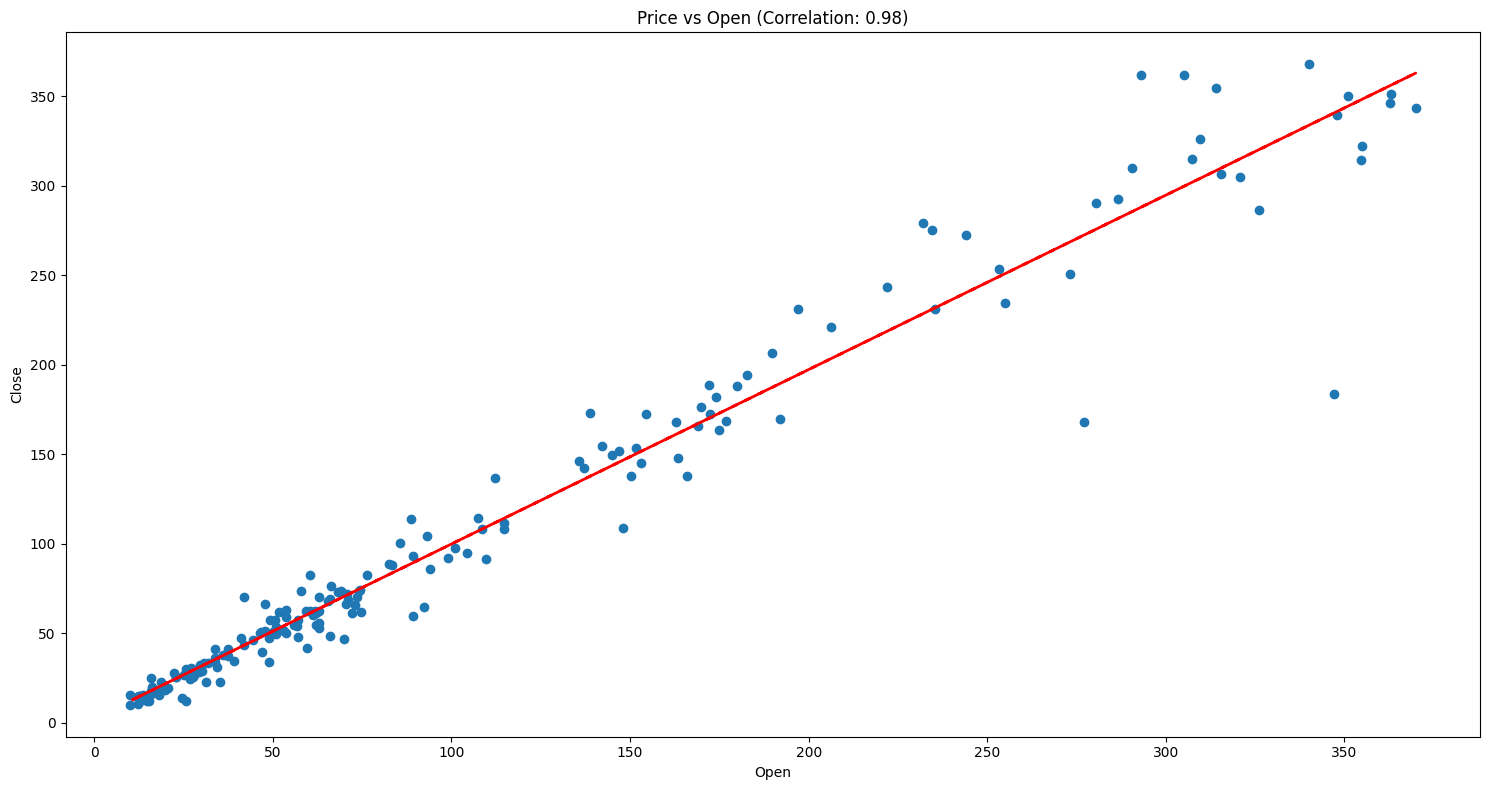

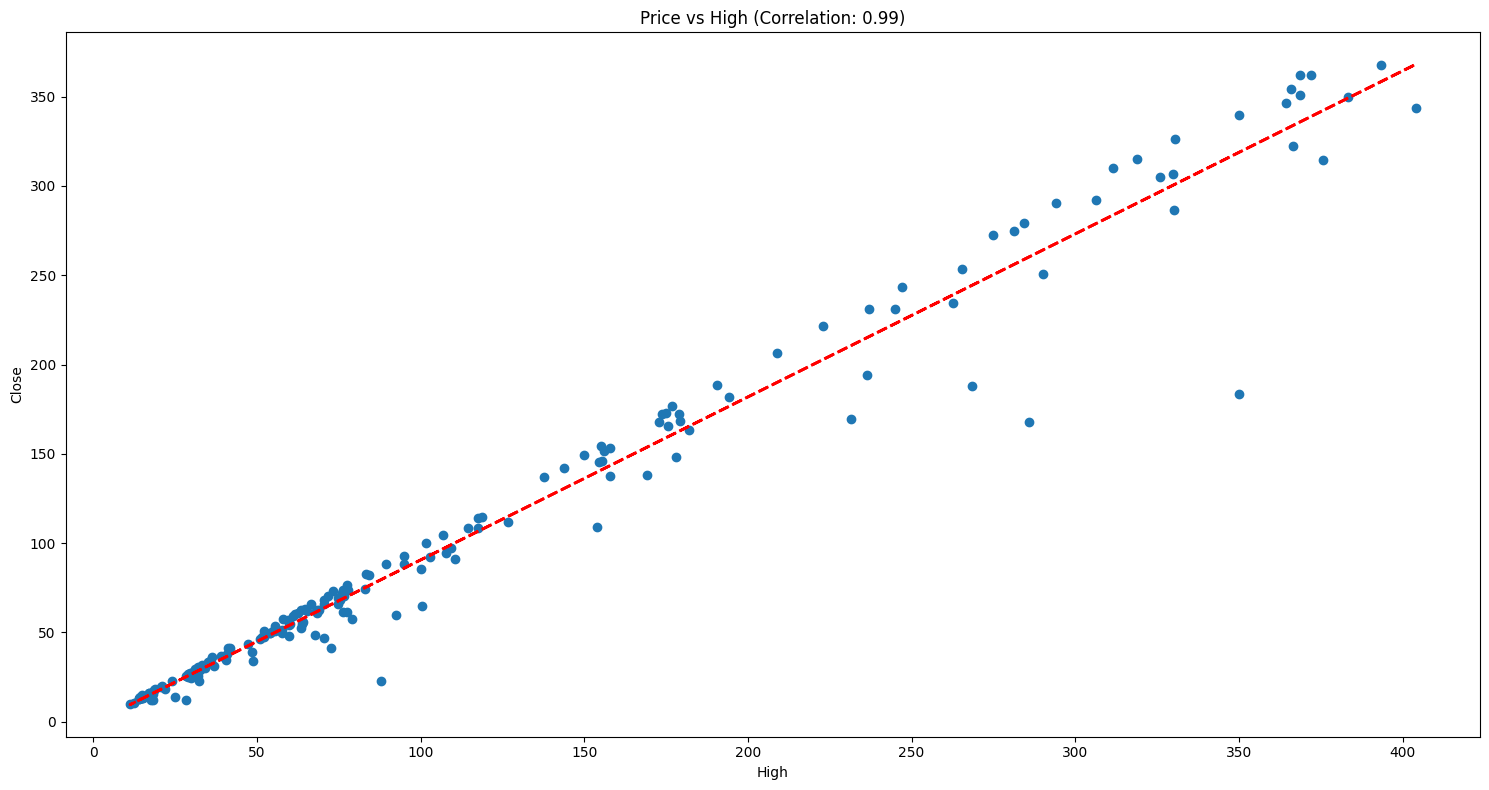

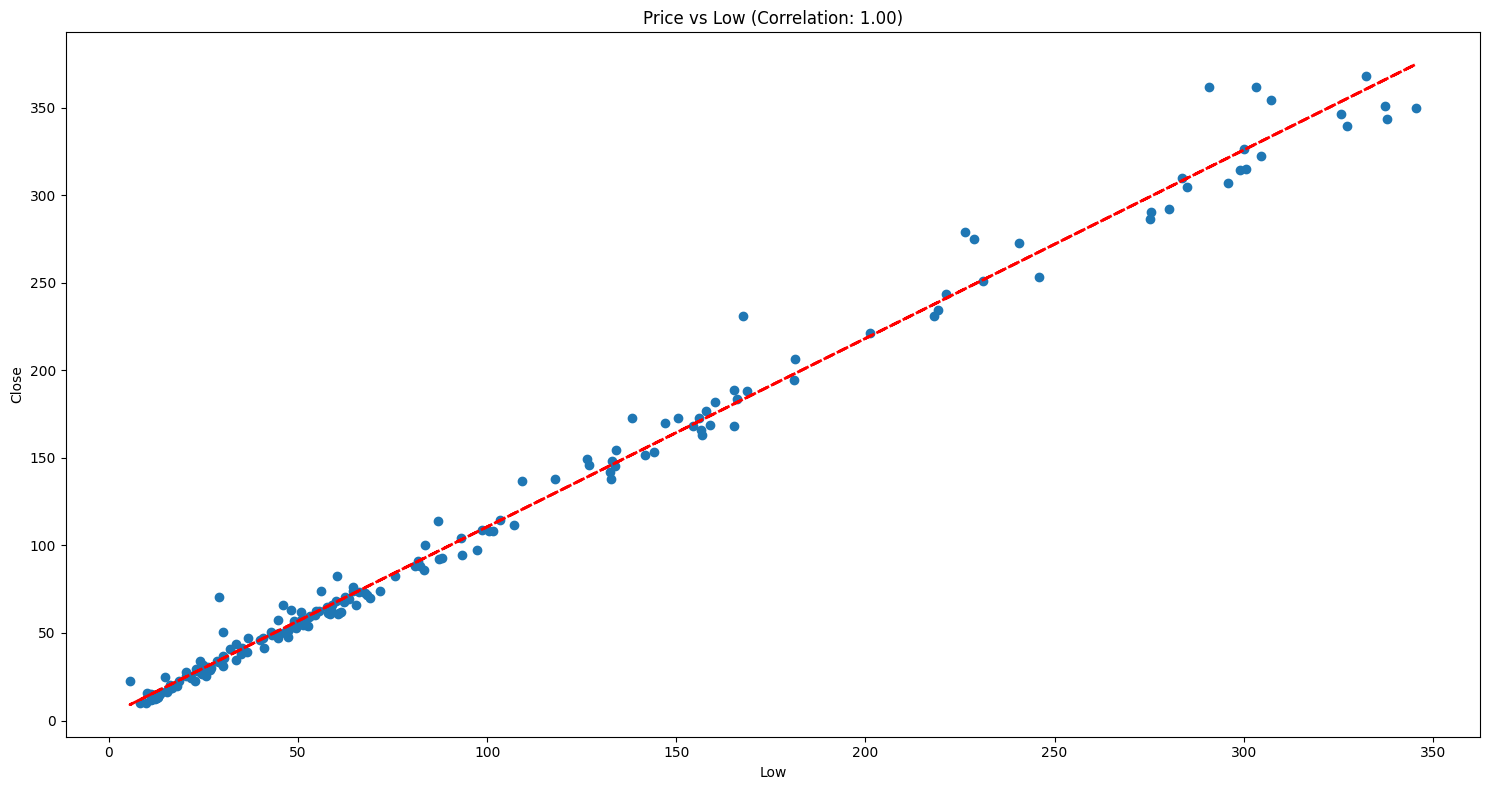

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the 'numerical_col' contains only numeric columns, excluding 'Date'
numerical_col = ['Open', 'High', 'Low']  # Ensure only numeric columns are here

# Loop over the numerical columns to plot scatter plots with correlation and trend line
for col in numerical_col:
    fig = plt.figure(figsize=(15, 8))
    ax = fig.gca()

    # Select the feature and the label
    features = data[col]
    label = data['Close']

    # Calculate the correlation between the feature and 'Close'
    correlation = features.corr(label)

    # Scatter plot between the feature and 'Close'
    plt.scatter(x=features, y=label)

    # Labeling the axes
    plt.xlabel(col)
    plt.ylabel('Close')

    # Set the title including the correlation value (rounded)
    plt.title(f'Price vs {col} (Correlation: {correlation:.2f})')

    # Fit a linear regression line
    z = np.polyfit(features, label, 1)  # degree 1 polynomial (linear)
    y_hat = np.poly1d(z)(features)

    # Plot the trend line
    plt.plot(features, y_hat, "r--", lw=2)

    # Display the plot
    plt.tight_layout()

# Finally, display all plots
plt.show()


# Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)
cal_vif(data[[i for i in data.describe().columns if i not in ['Close','Date']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


<Axes: >

<Figure size 1500x800 with 0 Axes>

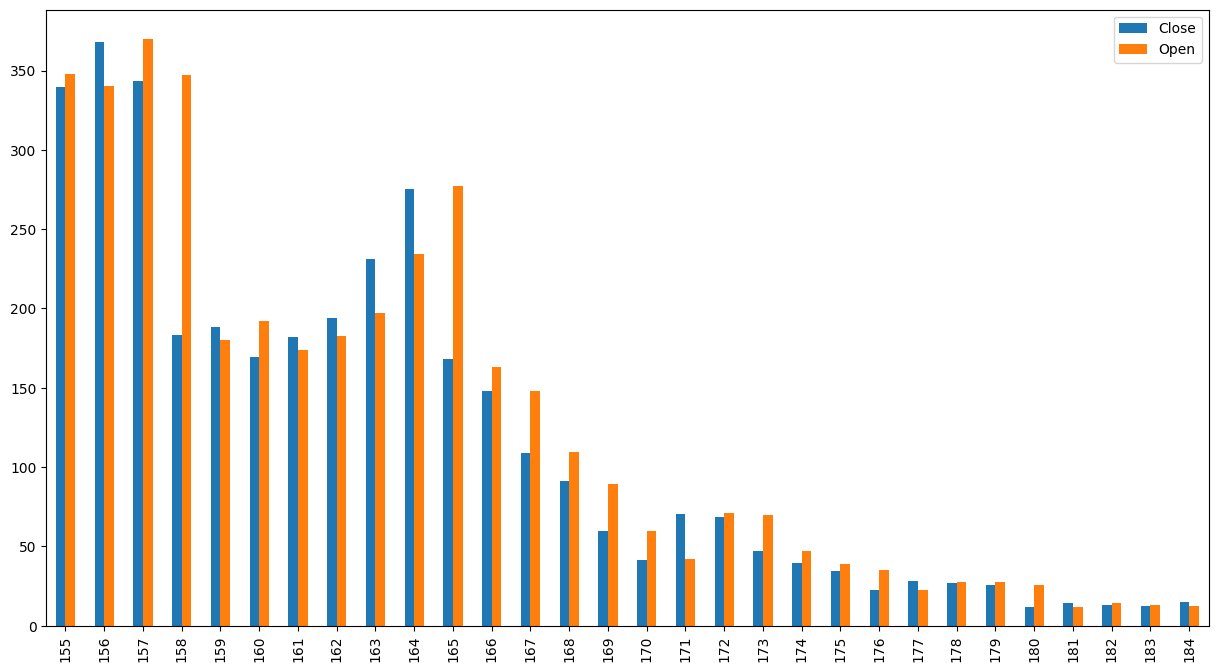

In [ ]:
plt.figure(figsize=(15,8))
data[['Close','Open']].tail(30).plot(kind='bar',figsize=(15,8))

# Linear Regression Model

Normalization

In [ ]:
from scipy.stats import zscore
import numpy as np

# Splitting our data into Dependent and Independent Variables
X = data.drop(columns=['Close', 'Date']).apply(zscore)  # Standardize features using zscore
y = np.log10(data['Close'])  # Apply log transformation to the 'Close' prices


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Creating Testing and Training Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Print the shapes of the datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(148, 3)
(37, 3)
(148,)
(37,)


# Linear Regrassion

In [ ]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.8146653424416905

In [ ]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

reg.intercept_



1.8292785179315048

In [ ]:
reg.coef_

array([-0.04654099,  0.19795929,  0.23173905])

# Evaluation Matrics

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_test_pred))
print("R2 :",r2_score(y_test, y_test_pred))

MSE : 0.03158251893048738
RMSE : 0.17771471219481907
MAE : 0.15128511034606282
R2 : 0.8225699915389754


In [ ]:
# Train Performance
print("MSE :",mean_squared_error(y_train, y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE :",mean_absolute_error(y_train, y_train_pred))
print("R2 :",r2_score(y_train, y_train_pred))

MSE : 0.033659395765946676
RMSE : 0.18346497149577812
MAE : 0.1559169766820056
R2 : 0.8146653424416905


# Linear Regression Predication vs Actual

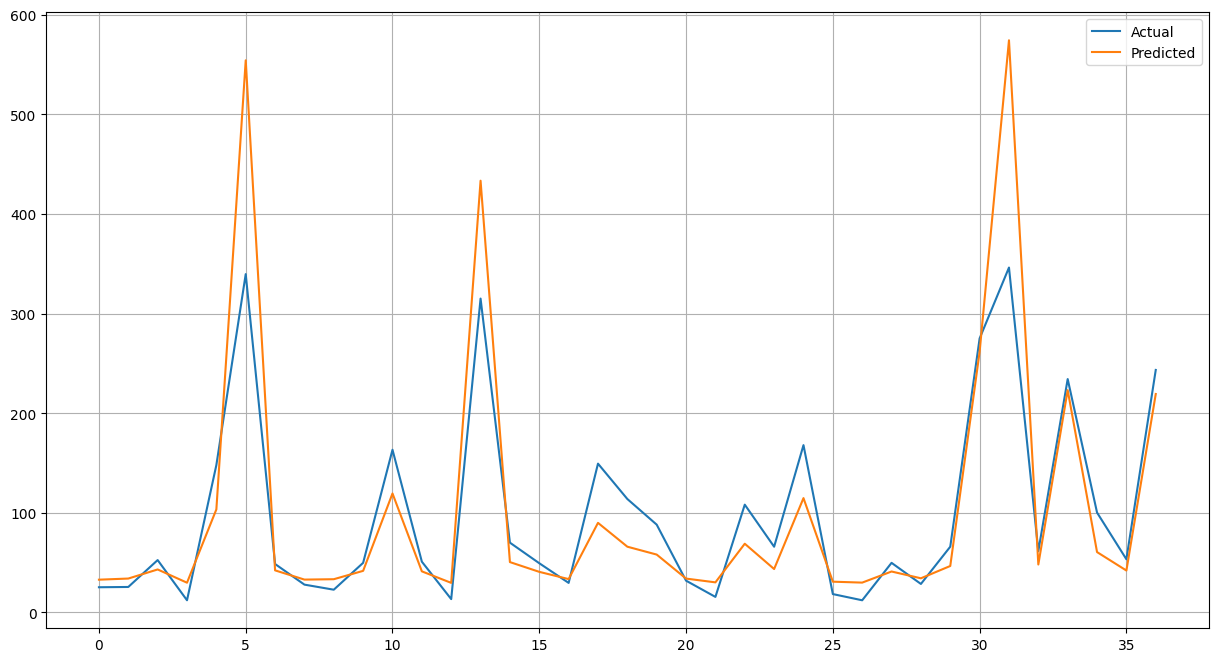

In [ ]:
# Linear Regression Plotting
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(X_train,y_train)
lasso.score(X_train,y_train)

0.8143673030311667

In [ ]:
y_lasso_pred = lasso.predict(X_test)

# Evaluation Matrics

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Test Performance Metrics
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))


MSE: 0.04360466359638443
RMSE: 0.20881729716760639
MAE: 0.1672170720015086
R²: 0.755029804687994


# Lasso Predication vs Actual (After Validification)

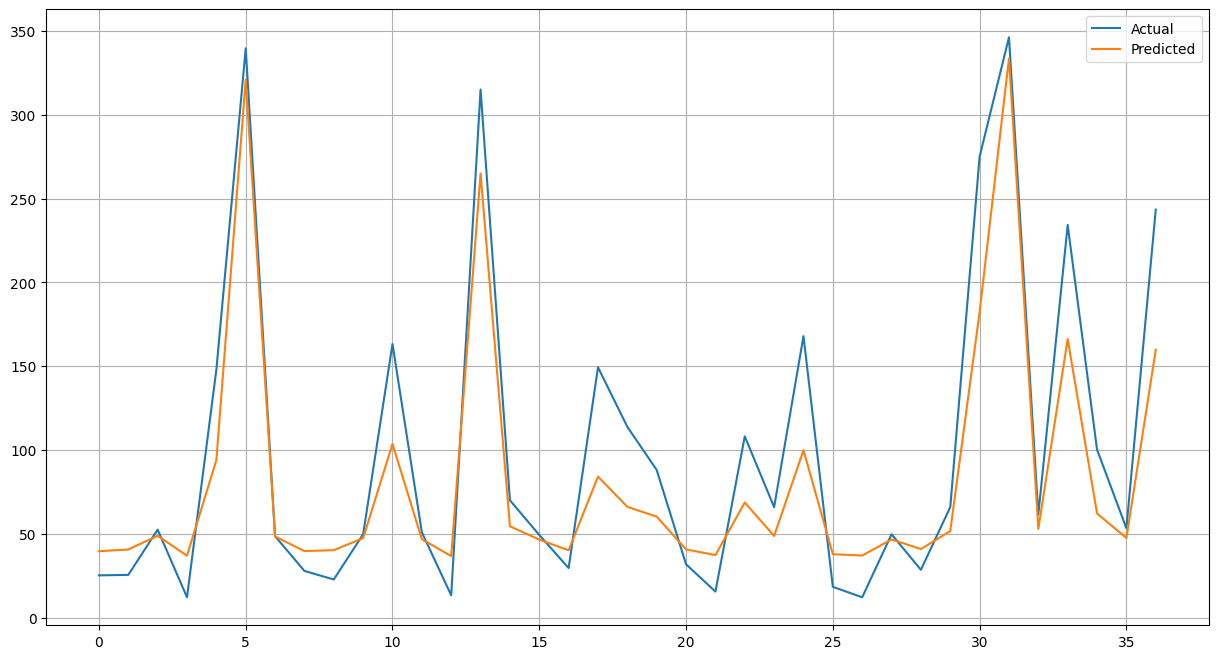

In [ ]:
# Lasso plotting
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

# Ridge Linear Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.81465524840887

In [ ]:
y_ridge_pred = ridge.predict(X_test)

In [ ]:
# Test performance

print("MSE :",mean_squared_error(y_test, y_ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("MAE :",mean_absolute_error(y_test, y_ridge_pred))
print("R2 :",r2_score(y_test, y_ridge_pred))

MSE : 0.03165980533958239
RMSE : 0.17793202449132756
MAE : 0.1514311710092201
R2 : 0.8221357979190861


# Ridge Predication vs Actual

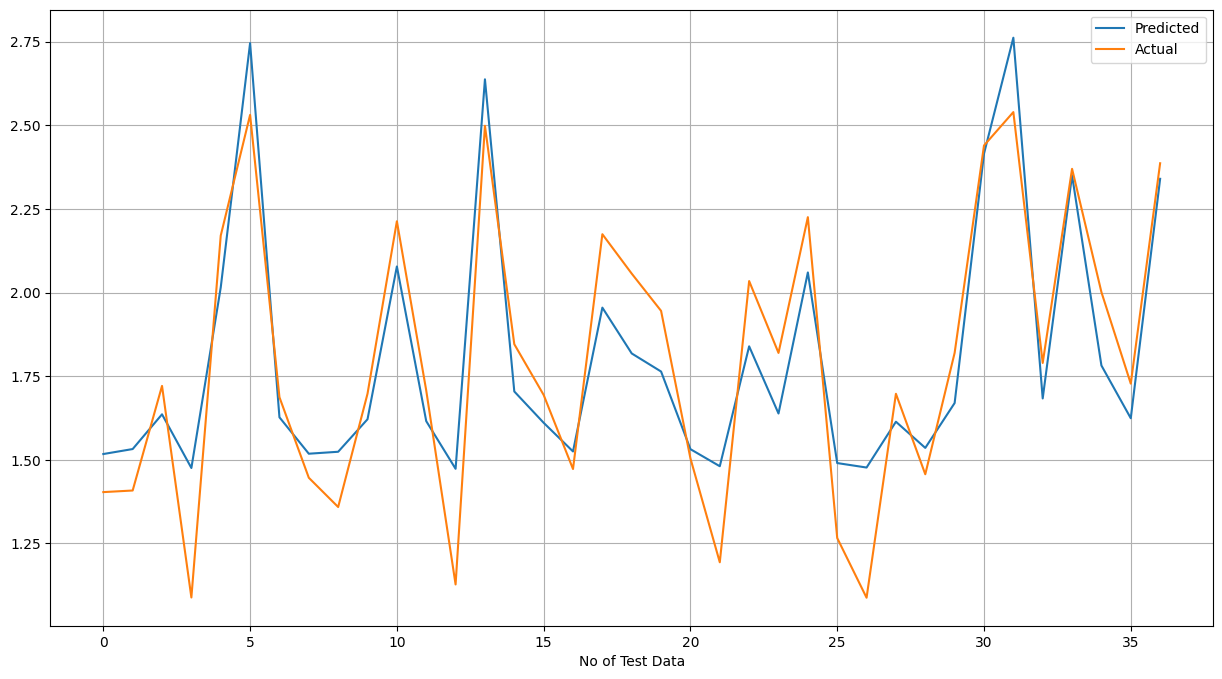

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_ridge_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

# Cross Validification

In [ ]:
 #Hyper-parameter Tuning
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model = GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_model.best_params_)
print("\nUsing ",ridge_model.best_params_, " the negative mean squared error is: ", ridge_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.035198971562466846


In [ ]:
# Model Predication
y_pred_ridge  = ridge_model.predict(X_test)

# Evaluation Matrics

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))

MSE : 0.03253593988266965
RMSE : 0.18037721553086924
MAE : 0.15307727568266652
R2 : 0.8172136902260576


# Ridge Predication vs Actual (After Validification)

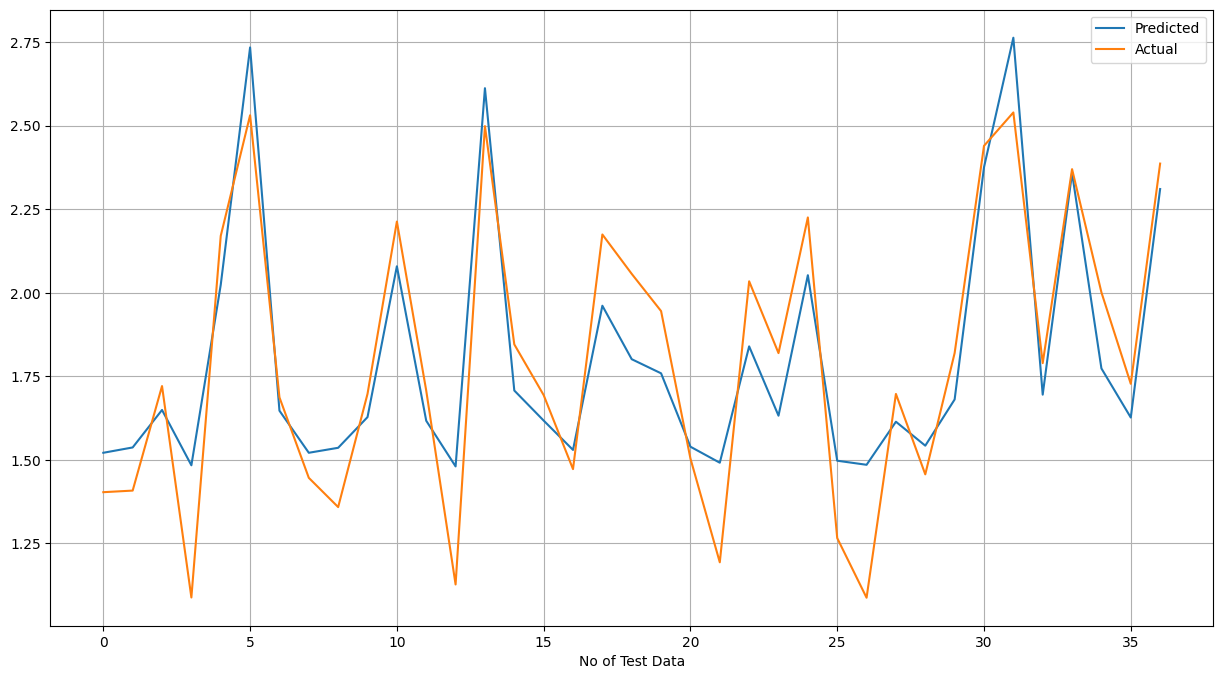

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

# Elastic Net Linear Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(X_train,y_train)

y_elastic_pred = elastic.predict(X_test)

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_elastic_pred)))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03640066957363815
RMSE : 0.19078959503504941
MAE : 0.15744198421541944
R2 : 0.7955017101500742


# ElasticNet Predication vs Actual

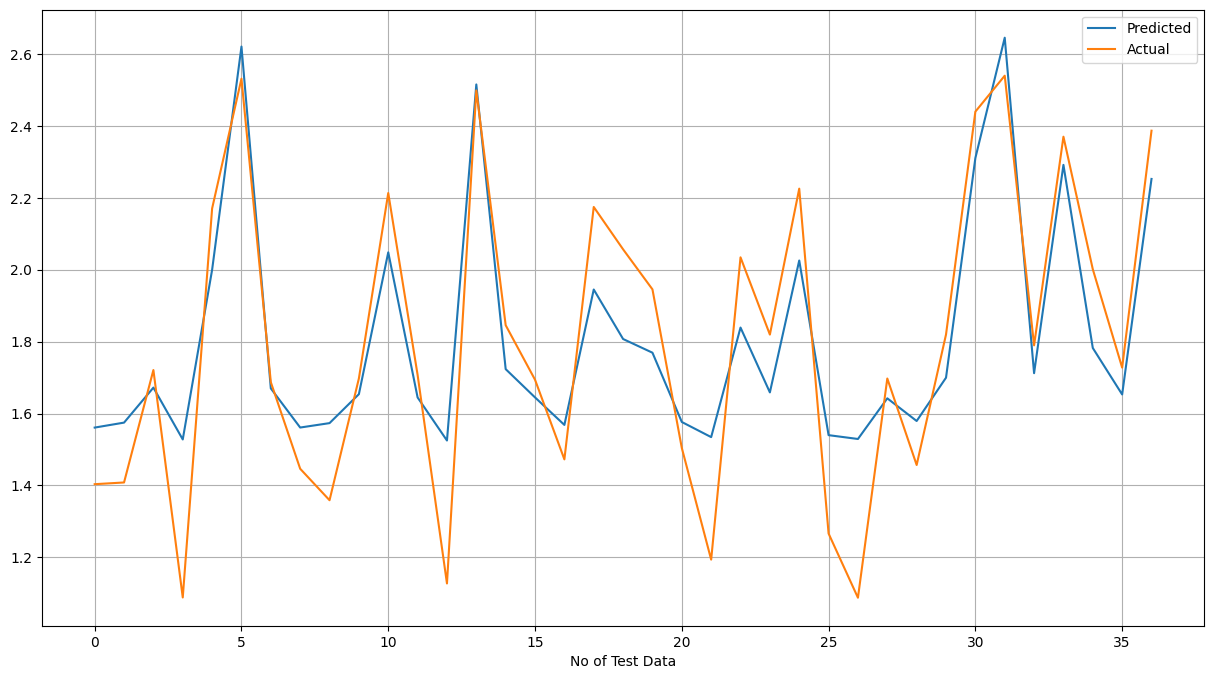

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_elastic_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

Cross Validification


In [ ]:
from sklearn.model_selection import GridSearchCV
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)
elastic_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.613e+00, tolerance: 1.798e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.636e+00, tolerance: 1.821e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+00, tolerance: 1.714e

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_model.best_params_)
print("\nUsing ",elastic_model.best_params_, " the negative mean squared error is: ", elastic_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 1}

Using  {'alpha': 0.01, 'l1_ratio': 1}  the negative mean squared error is:  -0.03515384844892758


In [ ]:
y_elastic_pred = elastic_model.predict(X_test)

# Evaluation Matrics

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test,y_elastic_pred )))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


# ElasticNet Predication vs Actual (After Validification)

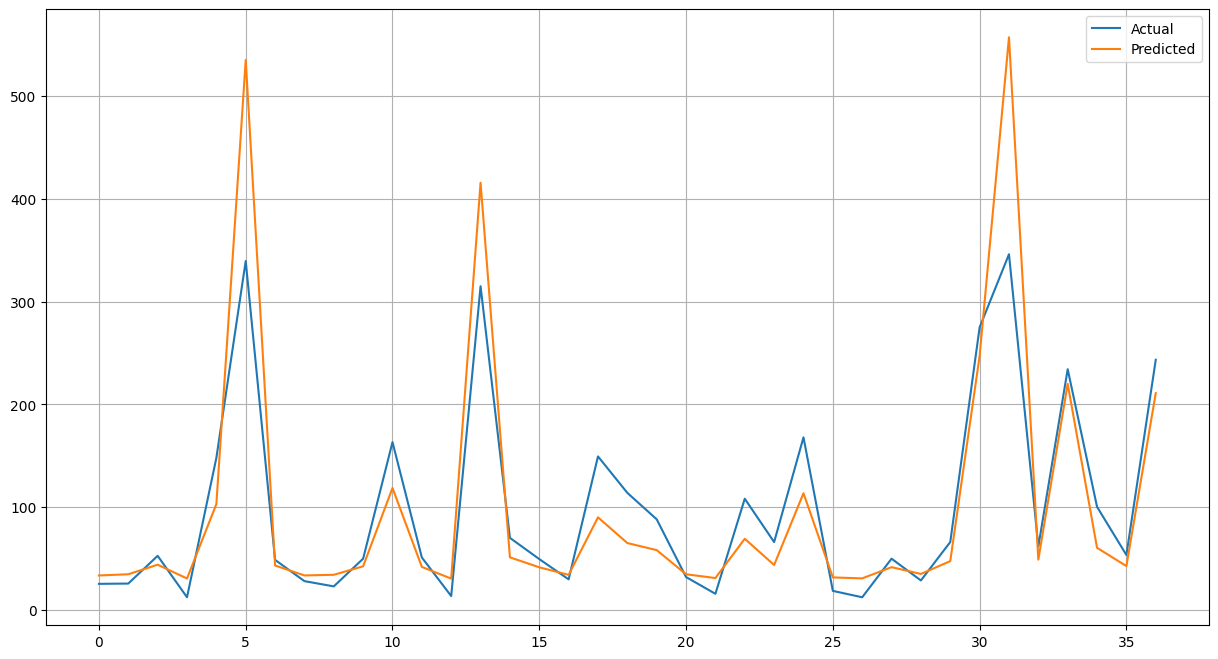

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

Conclusion of Yes Bank Stock Price Prediction Model:

Objective: The goal of the model was to predict the closing prices of Yes Bank stock using various features like Open, High, and Low prices, with the inclusion of polynomial features to capture potential non-linear relationships.

Feature Engineering:

Z-score Normalization: The features were standardized using z-scores to bring them onto a similar scale, which helps improve the performance of regression models, especially Lasso.

Model Choice:

Lasso Regression was chosen because of its ability to perform feature selection and reduce overfitting by penalizing the coefficients of less important features. This helps in dealing with a large number of polynomial features, where overfitting can be a concern.

Performance Metrics:

The model was evaluated using several metrics:
Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower MSE indicates better accuracy.

Root Mean Squared Error (RMSE): Provides a more interpretable error metric by bringing the MSE back to the original scale of the target variable.

Mean Absolute Error (MAE): Represents the average absolute difference between the predictions and the true values.

R² (R-Squared): Represents the proportion of variance in the target variable that is explained by the model. A higher R² indicates that the model can explain more variability in the stock prices.

Key Results:

The performance metrics (MSE, RMSE, MAE, and R²) indicated that the model had moderate success in predicting Yes Bank's stock prices.
The log transformation applied to the target variable (Close prices) helped to normalize the data, making it easier for the model to handle.
The inclusion of polynomial features improved the model's ability to capture non-linear patterns in the stock price movements.

Limitations:

Stock Price Volatility: The stock market is inherently volatile and influenced by numerous factors (economic indicators, news, investor sentiment, etc.) that might not be captured in this dataset.

Feature Limitation: The model only considered technical features like stock prices (Open, High, Low, Close). Incorporating additional data (e.g., trading volume, financial reports, or market sentiment) could further improve prediction accuracy.

Time-Series Nature: The model did not explicitly consider the time-series aspect of stock price data (e.g., using techniques like ARIMA, LSTM, etc.), which could be important in capturing temporal dependencies in stock prices

In summary, the Lasso regression model with polynomial features provided a reasonable approximation of Yes Bank's stock prices, but further refinement—especially incorporating more complex time-series analysis or additional features—would be needed for better accuracy and robustness.